In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch 
import torch.optim as optim


In [2]:
data = pd.read_csv('data_linear.csv').values
data

array([[  30.    ,  448.524 ],
       [  32.4138,  509.248 ],
       [  34.8276,  535.104 ],
       [  37.2414,  551.432 ],
       [  39.6552,  623.418 ],
       [  42.069 ,  625.992 ],
       [  44.4828,  655.248 ],
       [  46.8966,  701.377 ],
       [  49.3103,  748.918 ],
       [  51.7241,  757.881 ],
       [  54.1379,  831.004 ],
       [  56.5517,  855.409 ],
       [  58.9655,  866.707 ],
       [  61.3793,  902.545 ],
       [  63.7931,  952.261 ],
       [  66.2069,  995.531 ],
       [  68.6207, 1069.78  ],
       [  71.0345, 1074.42  ],
       [  73.4483, 1103.88  ],
       [  75.8621, 1138.69  ],
       [  78.2759, 1153.13  ],
       [  80.6897, 1240.27  ],
       [  83.1034, 1251.9   ],
       [  85.5172, 1287.97  ],
       [  87.931 , 1320.47  ],
       [  90.3448, 1374.92  ],
       [  92.7586, 1410.16  ],
       [  95.1724, 1469.69  ],
       [  97.5862, 1478.54  ],
       [ 100.    , 1515.28  ]])

In [4]:
x=torch.tensor(data[:,0],dtype=torch.float32)
x ## tach tung cot du lieu o tung hang va cot 0

tensor([ 30.0000,  32.4138,  34.8276,  37.2414,  39.6552,  42.0690,  44.4828,
         46.8966,  49.3103,  51.7241,  54.1379,  56.5517,  58.9655,  61.3793,
         63.7931,  66.2069,  68.6207,  71.0345,  73.4483,  75.8621,  78.2759,
         80.6897,  83.1034,  85.5172,  87.9310,  90.3448,  92.7586,  95.1724,
         97.5862, 100.0000])

In [5]:
y = torch.tensor(data[:,1], dtype=torch.float32)
y #cot 1 

tensor([ 448.5240,  509.2480,  535.1040,  551.4320,  623.4180,  625.9920,
         655.2480,  701.3770,  748.9180,  757.8810,  831.0040,  855.4090,
         866.7070,  902.5450,  952.2610,  995.5310, 1069.7800, 1074.4200,
        1103.8800, 1138.6899, 1153.1300, 1240.2700, 1251.9000, 1287.9700,
        1320.4700, 1374.9200, 1410.1600, 1469.6899, 1478.5400, 1515.2800])

In [6]:
x=x.unsqueeze(1)
x ## chuyen ve dang tensor (,1)

tensor([[ 30.0000],
        [ 32.4138],
        [ 34.8276],
        [ 37.2414],
        [ 39.6552],
        [ 42.0690],
        [ 44.4828],
        [ 46.8966],
        [ 49.3103],
        [ 51.7241],
        [ 54.1379],
        [ 56.5517],
        [ 58.9655],
        [ 61.3793],
        [ 63.7931],
        [ 66.2069],
        [ 68.6207],
        [ 71.0345],
        [ 73.4483],
        [ 75.8621],
        [ 78.2759],
        [ 80.6897],
        [ 83.1034],
        [ 85.5172],
        [ 87.9310],
        [ 90.3448],
        [ 92.7586],
        [ 95.1724],
        [ 97.5862],
        [100.0000]])

In [8]:
y=y.unsqueeze(1)
y

tensor([[[ 448.5240]],

        [[ 509.2480]],

        [[ 535.1040]],

        [[ 551.4320]],

        [[ 623.4180]],

        [[ 625.9920]],

        [[ 655.2480]],

        [[ 701.3770]],

        [[ 748.9180]],

        [[ 757.8810]],

        [[ 831.0040]],

        [[ 855.4090]],

        [[ 866.7070]],

        [[ 902.5450]],

        [[ 952.2610]],

        [[ 995.5310]],

        [[1069.7800]],

        [[1074.4200]],

        [[1103.8800]],

        [[1138.6899]],

        [[1153.1300]],

        [[1240.2700]],

        [[1251.9000]],

        [[1287.9700]],

        [[1320.4700]],

        [[1374.9200]],

        [[1410.1600]],

        [[1469.6899]],

        [[1478.5400]],

        [[1515.2800]]])

In [26]:
##Ham training se tim hieu sau
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(1, n_epochs + 1):
      y_hat = model(x)
      print(y_hat.shape, y.shape)
      loss = loss_fn(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if epoch % 1 == 0:
              losses.append(loss.item())
              print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return losses


In [22]:
linear_model=nn.Linear(1,1) # NN voi 1 input, 1 output 
optimizer=optim.SGD(linear_model.parameters(),lr=0.00004)

In [19]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.3160]], requires_grad=True),
 Parameter containing:
 tensor([0.1898], requires_grad=True)]

In [27]:
loss = training_loop(
  n_epochs = 10,
  optimizer = optimizer,
  model = linear_model,
  loss_fn = nn.MSELoss(),
  x = x, 
  y = y
)

torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 1, Loss 240536.171875
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 2, Loss 210670.171875
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 3, Loss 198927.875000
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 4, Loss 194310.703125
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 5, Loss 192494.687500
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 6, Loss 191779.906250
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 7, Loss 191498.093750
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 8, Loss 191386.500000
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 9, Loss 191341.796875
torch.Size([30, 1]) torch.Size([30, 1, 1])
Epoch 10, Loss 191323.406250


Text(0, 0.5, 'loss')

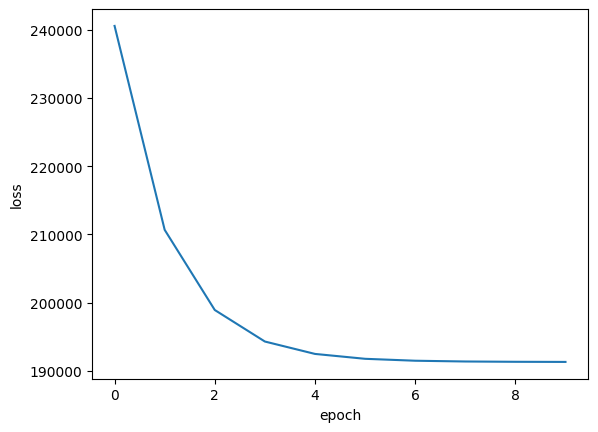

In [28]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')

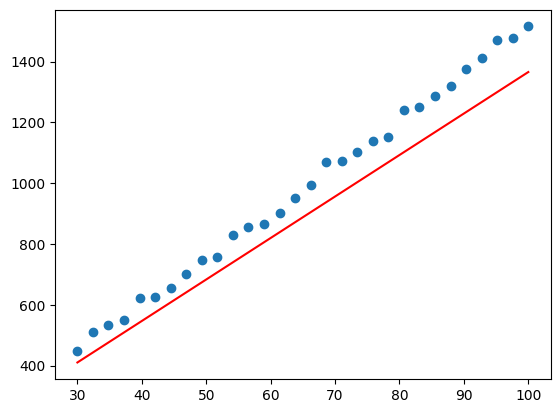

In [31]:
x=torch.tensor(data[:,0],dtype=torch.float32)
y=torch.tensor(data[:,1],dtype=torch.float32)
x=x.unsqueeze(1)

with torch.no_grad():
    y_hat=linear_model(x)
plt.scatter(x,y)

plt.plot(x,y_hat,c='r')

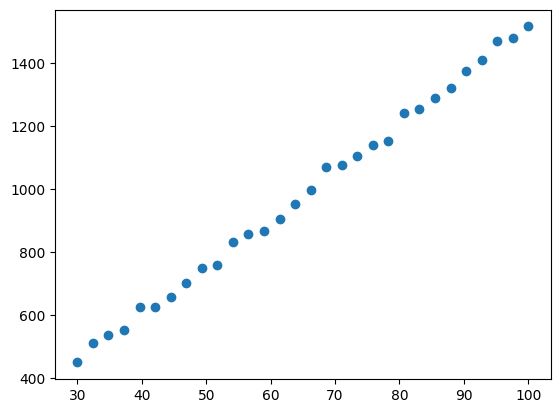

In [30]:
plt.scatter(x,y)